# 학습목표
- 감성분석 모델링
    - 감성분석이란? -> 사람의 감정, 기분 태도를 분석하는 기법
- 자연어 처리
    - konlpy 패키지 내에 있는 다양한 형태소 분석기들을 사용
    - konlpy: 한국어 자연어 처리를 위한 파이썬 패키지 

In [2]:
# konply
# 1. 로컬컴퓨터에 환경설정(jdk,jpye)이 까다로워 컴퓨터마다 안될수도 있음 -> colab
# 2. konlpy 중 mecab 형태소분석기 -> 리눅스 운영체제에서 사용가능 -> colab 진행

# 위 두가지 이유로 자연어처리(형태소 분석, 토큰화 작업)은 colab에서 진행

In [3]:
# colab에서 전처리 진행한 clan_morphs.pkl 파일 불러와서 실습 진행
import pickle
with open('data/clean_morphs.pkl','rb') as f: # 읽어올거라서 rb임!
    clean_morphs = pickle.load(f)

In [4]:
clean_morphs

[['배공', '빠르'],
 ['택배', '엉망', '저희', '없이', '놔두'],
 ['아주',
  '아요',
  '바지',
  '정말',
  '아서',
  '구매',
  '어요',
  '가격',
  '대박',
  '입니다',
  '바느질',
  '조금',
  '엉성',
  '지만',
  '편하',
  '성비',
  '최고',
  '예요'],
 ['선물',
  '으로',
  '빨리',
  '아서',
  '전달',
  '했어야',
  '상품',
  '는데',
  '머그',
  '와서',
  '당황',
  '습니다',
  '전화',
  '더니',
  '바로',
  '신다',
  '지만',
  '배송',
  '누락',
  '네요',
  '확인',
  '바로',
  '선물',
  '으면',
  '큰일날',
  '네요',
  '이렇게',
  '배송',
  '오래',
  '걸렸',
  '으면',
  '다시',
  '생각',
  '아요',
  '아쉽',
  '네요'],
 ['민트', '색상', '예뻐요', '손잡이', '용도', '사용', '네요'],
 ['비추',
  '합니다',
  '계란',
  '뒤집',
  '완전',
  '불편',
  '해요',
  '코팅',
  '묻어나',
  '예쁘',
  '실용',
  '으로',
  '보였',
  '는데',
  '생각',
  '보다',
  '진짜',
  '별로',
  '입니다'],
 ['주문',
  '시켰',
  '는데',
  '배송',
  '네요',
  '여기',
  '회사',
  '전화',
  '아무런',
  '연락',
  '으니',
  '답답',
  '다른',
  '에서',
  '추천',
  '드립니다'],
 ['넉넉', '길이', '주문', '는데', '네요', '별로'],
 ['계속', '처럼', '나오', '다가', '지금', '네요'],
 ['인데',
  '전문',
  '속옷',
  '브랜드',
  '위생',
  '팬티',
  '보다',
  '해요',
  '불편',
  '해요',
  '부분',
  '신축성',
 

### 수치화 (특성추출)
- 의미있는 정보를 담고있는 숫자형태로 변경하는 방법
- 빈도기반의 인코딩
- 원핫인코딩
- BOW
  - countvectorizer: 단순 카운트 기반 벡터화
  - TF-IDF: 특정 문서에 자주 등장하는 단어에 가중치를 주는 방법
  - 단어사전 구축하여 문장내의 단어빈도를 측정 

In [5]:
# 단순 카운트 기반 벡터화 -> countvectorizer 불러오기
from sklearn.feature_extraction.text import CountVectorizer
# 객체생성
cv = CountVectorizer()

In [6]:
sample_text = clean_morphs[:10]

In [7]:
# countvectorizer 안에 토큰화 해주는 기능이 내장되어 있기 때문에 문장을 하나로 전처리해주는 작업이 필요
sample_text2 = [' '.join(s) for s in sample_text]

In [8]:
cv.fit(sample_text2)

CountVectorizer()

In [9]:
# 구축된 단어사전 확인 -> 유니크한 단어들이다!!!!!!!!!
cv.vocabulary_
len(cv.vocabulary_)

104

In [10]:
# 단어사전을 기반으로 문장내의 단어 빈도를 측정!
result = cv.transform(sample_text2)
result

<10x104 sparse matrix of type '<class 'numpy.int64'>'
	with 127 stored elements in Compressed Sparse Row format>

In [11]:
import pandas as pd
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize) # 전체 칼럼보기

In [12]:
# 단어사전에 문장별로 데이터 유무를 확인하고 싶다면? -> toarray()
result.toarray()[0] # 무슨 단어가 있는지 알 수 없는 상태 -> 데이터 프레임이 필요하다!

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
# 위에서 확인한 데이터를 DataFrame으로 만들어서 확인
df = pd.DataFrame([cv.vocabulary_.keys()],
            columns=cv.vocabulary_.values())

In [14]:
result_df=df.sort_index(axis=1) # 무슨 단어인지 + 빈도수 동시에 확인하기 위해 concate 필요

In [15]:
pd.concat([result_df, pd.DataFrame(result.toarray())]) # 두개 합칠거니까 리스트 형태로 만든다.

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,가격,걸렸,계란,계속,구매,길이,나오,넉넉,네요,놔두,...,코팅,큰일날,택배,팬티,편하,합니다,해요,했어야,확인,회사
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,3,0,...,0,1,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# 형태소 분석한 결과를 활용하여 워드클라우드 그려보기!
# 토큰화된 데이터와 별점 데이터를 붙이기
# 긍정데이터만 가져와서 워드클라우드 그리기
# wordcloud 패키지 설치
# !pip install wordcloud

In [17]:
from wordcloud import WordCloud

In [18]:
naver_data = pd.read_csv('data/naver_shopping.txt', delimiter='\t',names=['별점','리뷰'])

In [19]:
clean_morphs

[['배공', '빠르'],
 ['택배', '엉망', '저희', '없이', '놔두'],
 ['아주',
  '아요',
  '바지',
  '정말',
  '아서',
  '구매',
  '어요',
  '가격',
  '대박',
  '입니다',
  '바느질',
  '조금',
  '엉성',
  '지만',
  '편하',
  '성비',
  '최고',
  '예요'],
 ['선물',
  '으로',
  '빨리',
  '아서',
  '전달',
  '했어야',
  '상품',
  '는데',
  '머그',
  '와서',
  '당황',
  '습니다',
  '전화',
  '더니',
  '바로',
  '신다',
  '지만',
  '배송',
  '누락',
  '네요',
  '확인',
  '바로',
  '선물',
  '으면',
  '큰일날',
  '네요',
  '이렇게',
  '배송',
  '오래',
  '걸렸',
  '으면',
  '다시',
  '생각',
  '아요',
  '아쉽',
  '네요'],
 ['민트', '색상', '예뻐요', '손잡이', '용도', '사용', '네요'],
 ['비추',
  '합니다',
  '계란',
  '뒤집',
  '완전',
  '불편',
  '해요',
  '코팅',
  '묻어나',
  '예쁘',
  '실용',
  '으로',
  '보였',
  '는데',
  '생각',
  '보다',
  '진짜',
  '별로',
  '입니다'],
 ['주문',
  '시켰',
  '는데',
  '배송',
  '네요',
  '여기',
  '회사',
  '전화',
  '아무런',
  '연락',
  '으니',
  '답답',
  '다른',
  '에서',
  '추천',
  '드립니다'],
 ['넉넉', '길이', '주문', '는데', '네요', '별로'],
 ['계속', '처럼', '나오', '다가', '지금', '네요'],
 ['인데',
  '전문',
  '속옷',
  '브랜드',
  '위생',
  '팬티',
  '보다',
  '해요',
  '불편',
  '해요',
  '부분',
  '신축성',
 

In [20]:
# 리스트 형태로 되어있는 데이터를 별점과 concat 해주기 위해서 DataFrame으로 변경
# 리스트로 묶여있는 데이터를 문자열로 변경
clean_morphs2 = [' '.join(s) for s in clean_morphs] # 전체 데이터 대상으로 df 만들어줄거라서 한번 더 쓴 코드임.

In [21]:
temp = pd.DataFrame(clean_morphs2, columns=['리뷰'])

In [22]:
review_data = pd.concat([temp, naver_data['별점']], axis=1) # 열단위로 합칠거니까 axis = 1로 해줘야 함.
review_data

,리뷰,별점
0,배공 빠르,5
1,택배 엉망 저희 없이 놔두,2
2,아주 아요 바지 정말 아서 구매 어요 가격 대박 입니다 바느질 조금 엉성 지만 편하...,5
3,선물 으로 빨리 아서 전달 했어야 상품 는데 머그 와서 당황 습니다 전화 더니 바로...,2
4,민트 색상 예뻐요 손잡이 용도 사용 네요,5
...,...,...
199995,장마 그런가 아요,2
199996,다이슨 케이스 구매 어요 다이슨 슈퍼 소닉 드라 이기 케이스 구매 어요 가격 괜찮 ...,5
199997,로드 에서 보다 세배 저렴 네요 ㅜㅜ 자주 이용 할께요,5
199998,이쁘 보이 네요,5


In [23]:
review_data[(review_data['별점'] == 5) | (review_data['별점'] == 4)]['리뷰']

0                                                     배공 빠르
2         아주 아요 바지 정말 아서 구매 어요 가격 대박 입니다 바느질 조금 엉성 지만 편하...
4                                    민트 색상 예뻐요 손잡이 용도 사용 네요
10                                                사이즈 귀엽 아요
14                                            촉감 무게 이나 편합니다
                                ...                        
199994    전반 으로 이나 각종 서비스 완성도 그러나 서버 다운 서버 다운 그냥 콘센트 밖에 ...
199996    다이슨 케이스 구매 어요 다이슨 슈퍼 소닉 드라 이기 케이스 구매 어요 가격 괜찮 ...
199997                       로드 에서 보다 세배 저렴 네요 ㅜㅜ 자주 이용 할께요
199998                                             이쁘 보이 네요
199999                       아직 사용 다른 제품 어서 모르 지만 배송 빨랐 습니다
Name: 리뷰, Length: 99963, dtype: object

In [24]:
review_data

,리뷰,별점
0,배공 빠르,5
1,택배 엉망 저희 없이 놔두,2
2,아주 아요 바지 정말 아서 구매 어요 가격 대박 입니다 바느질 조금 엉성 지만 편하...,5
3,선물 으로 빨리 아서 전달 했어야 상품 는데 머그 와서 당황 습니다 전화 더니 바로...,2
4,민트 색상 예뻐요 손잡이 용도 사용 네요,5
...,...,...
199995,장마 그런가 아요,2
199996,다이슨 케이스 구매 어요 다이슨 슈퍼 소닉 드라 이기 케이스 구매 어요 가격 괜찮 ...,5
199997,로드 에서 보다 세배 저렴 네요 ㅜㅜ 자주 이용 할께요,5
199998,이쁘 보이 네요,5


In [25]:
cv.fit(review_data['리뷰'])

CountVectorizer()

In [26]:
cv.vocabulary_
len(cv.vocabulary_)

40429

In [27]:
result = cv.transform(review_data['리뷰'])
result

<200000x40429 sparse matrix of type '<class 'numpy.int64'>'
	with 1697921 stored elements in Compressed Sparse Row format>

In [28]:
df = pd.DataFrame([cv.vocabulary_.keys()],
            columns=cv.vocabulary_.values())

In [29]:
result_df=df.sort_index(axis=1)

In [31]:
# kiwi 설치
#!pip install kiwipiepy

In [32]:
# 라이브러리 불러오기
from kiwipiepy import Kiwi
kiwi=Kiwi()

In [33]:
from kiwipiepy.utils import Stopwords
stopwords = Stopwords()

In [40]:
# 띄어쓰기 중심으로 토큰화 : nltk 패키지 활용 natural language toolkit
from nltk import word_tokenize # 토큰화를 도와주는 도구
import nltk
nltk.download('punkt') # 문장부호 정보를 다운로드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
from tqdm import tqdm

In [48]:
# 형태소로 분리된 단어토큰을 담아줄 리스트
morphs_list = []
for w in tqdm(review_data['리뷰'][1:10000]):
    morphs_result = kiwi.tokenize(w, stopwords=stopwords)  # 형태소분리, 불용어처리
    morphs_list = morphs_list + morphs_result

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:12<00:00, 801.82it/s]


In [49]:
len(morphs_list)

99813

In [50]:
# 일반명사(NNG), 동사(VV), 형용사(VA) 필터링해서 추출해보자~
morphs_filtering_list = []
for m in morphs_list:
    if m.tag in ['NNG','VV','VA']:
        morphs_filtering_list.append(m.form)

In [51]:
morphs_filtering_list

['택배',
 '엉망',
 '놔두',
 '바지',
 '구매',
 '가격',
 '박',
 '바느질',
 '편하',
 '성비',
 '최고',
 '선물',
 '전달',
 '상품',
 '머그',
 '오',
 '당황',
 '전화',
 '신',
 '배송',
 '누락',
 '확인',
 '선물',
 '큰일',
 '나',
 '배송',
 '걸리',
 '생각',
 '민트',
 '색상',
 '예쁘',
 '손잡이',
 '용도',
 '사용',
 '비추',
 '계란',
 '뒤',
 '집',
 '불편',
 '코팅',
 '묻어나',
 '예쁘',
 '실용',
 '보이',
 '생각',
 '주문',
 '배송',
 '회사',
 '전화',
 '연락',
 '추천',
 '드리',
 '길이',
 '주문',
 '나오',
 '전문',
 '속옷',
 '브랜드',
 '위생',
 '팬티',
 '불편',
 '부분',
 '신축',
 '반',
 '실',
 '사이즈',
 '사이즈',
 '편하',
 '부분',
 '늘어나',
 '사이즈',
 '베이지',
 '구매',
 '살색',
 '화면',
 '컬러',
 '돋보이',
 '쓰',
 '티',
 '치',
 '티',
 '티',
 '티',
 '티',
 '티',
 '촉감',
 '무게',
 '편하',
 '사이즈',
 '구매',
 '친구',
 '나',
 '실내',
 '모르',
 '구매',
 '으',
 '이상',
 '가게',
 '운영',
 '사장',
 '대신',
 '구매',
 '구매',
 '가게',
 '으',
 '이쁘',
 '가성',
 '괜찮',
 '바퀴',
 '고정',
 '화장',
 '지우',
 '거품',
 '생기',
 '문지르',
 '정력',
 '남자',
 '유해',
 '성분',
 '초등',
 '바르',
 '채집',
 '통',
 '결',
 '채집',
 '통',
 '결',
 '착',
 '결착',
 '부분',
 '모서리',
 '부분',
 '덜',
 '결',
 '해당',
 '부분',
 '제품',
 '불량',
 '보내',
 '최소한',
 '테스트',
 '보내',
 '구매',
 '팽이',
 '빠

In [53]:
from collections import Counter

In [54]:
counter = Counter(morphs_filtering_list)
words_most_45 = counter.most_common(45)

In [55]:
words_most_45

[('구매', 1769),
 ('배송', 1451),
 ('사용', 704),
 ('빠르', 703),
 ('슬', 632),
 ('제품', 630),
 ('주문', 560),
 ('가격', 550),
 ('생각', 546),
 ('만족', 544),
 ('사이즈', 420),
 ('맛있', 352),
 ('포장', 336),
 ('상품', 314),
 ('쓰', 308),
 ('괜찮', 305),
 ('냄새', 305),
 ('보내', 302),
 ('이쁘', 273),
 ('모르', 266),
 ('부분', 264),
 ('감사', 257),
 ('예쁘', 233),
 ('편하', 231),
 ('세', 229),
 ('반품', 229),
 ('정도', 227),
 ('구입', 215),
 ('나오', 209),
 ('느낌', 208),
 ('보이', 206),
 ('나', 199),
 ('떨어지', 197),
 ('사진', 196),
 ('불편', 190),
 ('깔끔', 182),
 ('오', 173),
 ('디자인', 173),
 ('색상', 172),
 ('효과', 170),
 ('마음', 162),
 ('시키', 160),
 ('선물', 154),
 ('귀찮', 153),
 ('빠지', 148)]

In [56]:
# 객체 생성
wc = WordCloud(background_color = 'white', # 배경색 설정
              random_state = 828,
              font_path = r'C:\Windows\Fonts\malgun.ttf') 

In [57]:
# 입력할 때 딕셔너리 형태로 입력할 것!
# 단어 빈도에 따른 워드클라우드 생성
wc_rs = wc.generate_from_frequencies(dict(words_most_45))

In [58]:
import matplotlib.pyplot as plt #matplotlib에서 한글인코딩 필수
plt.rc('font',family="Malgun Gothic")

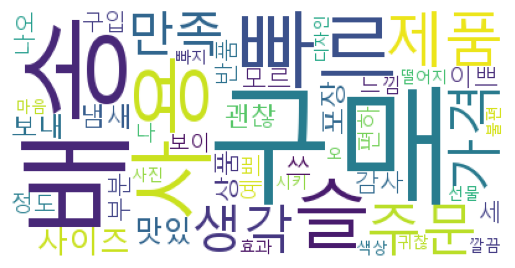

In [59]:
plt.imshow(wc_rs)
plt.axis('off')
plt.show()